In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\Yibabe\Desktop\10academyAIMweek-6\data\data.csv')

# Overview of the dataset
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")



Number of Rows: 95662
Number of Columns: 16


In [2]:

# Display column names and their data types
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [3]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [3]:
# Check the first few rows of the data
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
# Summary statistics for numerical columns
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [5]:


# Summary statistics for categorical columns (if needed)
df.describe(include=['object'])


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


select the most critical columns to get most efficient model and decrease the complexity of the EDA analysis

In [4]:

# Select the 10 critical columns for analysis
selected_columns = ['Amount', 'Value', 'FraudResult', 'CountryCode', 
                    'ChannelId', 'CustomerId', 'ProviderId', 'ProductCategory', 
                    'PricingStrategy', 'TransactionStartTime']




In [6]:

# Convert 'TransactionStartTime' to datetime type if not already done
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], errors='coerce')

# Display summary statistics for numerical columns
summary_stats = df[selected_columns].describe()
summary_stats


,Amount,Value,FraudResult,CountryCode,PricingStrategy
count,9.566200e+04,9.566200e+04,95662.000000,95662.0,95662.000000
mean,6.717846e+03,9.900584e+03,0.002018,256.0,2.255974
std,1.233068e+05,1.231221e+05,0.044872,0.0,0.732924
min,-1.000000e+06,2.000000e+00,0.000000,256.0,0.000000
25%,-5.000000e+01,2.750000e+02,0.000000,256.0,2.000000
50%,1.000000e+03,1.000000e+03,0.000000,256.0,2.000000
75%,2.800000e+03,5.000000e+03,0.000000,256.0,2.000000
max,9.880000e+06,9.880000e+06,1.000000,256.0,4.000000


In [8]:
# Additional metrics: skewness and kurtosis for numerical columns
skewness = df[['Amount', 'Value']].skew()
kurtosis = df[['Amount', 'Value']].kurtosis()

# Display the results
print("Summary Statistics:\n")
summary_stats


Summary Statistics:



,Amount,Value,FraudResult,CountryCode,PricingStrategy
count,9.566200e+04,9.566200e+04,95662.000000,95662.0,95662.000000
mean,6.717846e+03,9.900584e+03,0.002018,256.0,2.255974
std,1.233068e+05,1.231221e+05,0.044872,0.0,0.732924
min,-1.000000e+06,2.000000e+00,0.000000,256.0,0.000000
25%,-5.000000e+01,2.750000e+02,0.000000,256.0,2.000000
50%,1.000000e+03,1.000000e+03,0.000000,256.0,2.000000
75%,2.800000e+03,5.000000e+03,0.000000,256.0,2.000000
max,9.880000e+06,9.880000e+06,1.000000,256.0,4.000000


In [9]:
print("\nSkewness of Amount and Value:\n")
skewness


Skewness of Amount and Value:



Amount    51.098490
Value     51.291086
dtype: float64

In [10]:
print("\nKurtosis of Amount and Value:\n")
kurtosis


Kurtosis of Amount and Value:



Amount    3363.127739
Value     3378.069274
dtype: float64

orrelation Analysis

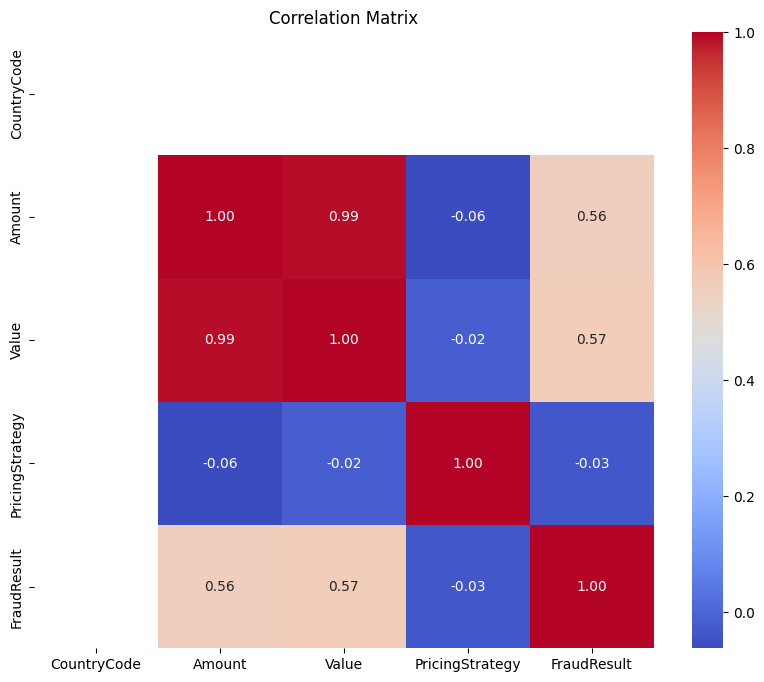

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix for numerical columns only
corr_matrix = numerical_columns.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



Identifying Missing Values

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (missing_values / df.shape[0]) * 100

# Display columns with missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


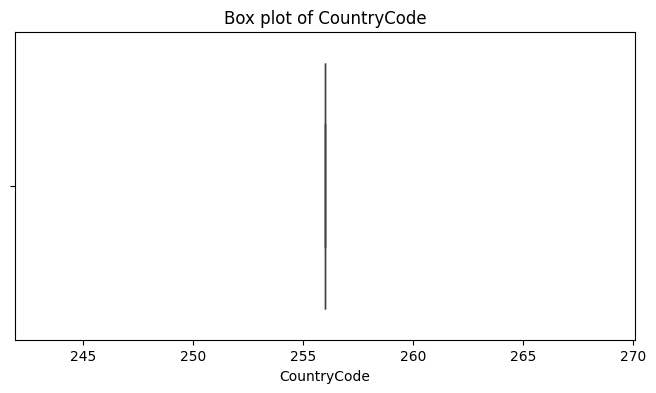

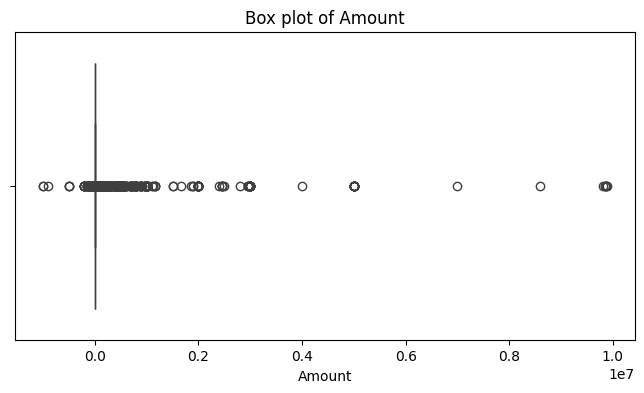

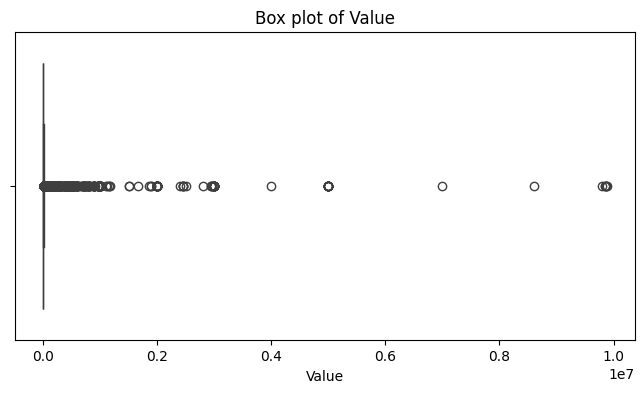

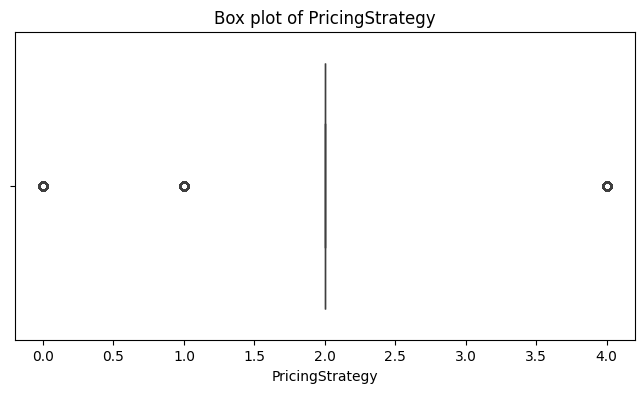

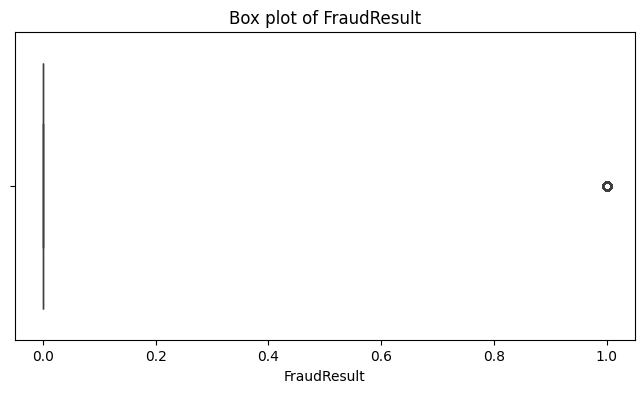

In [5]:
# Box plot for numerical features
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box plot of {col}')
    plt.show()


Identifying Missing Values